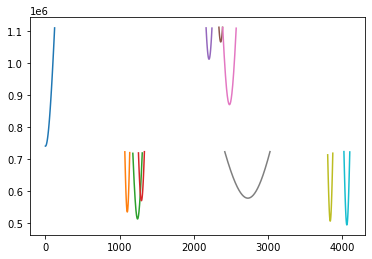

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np

passes_df = pd.read_pickle('Telesat_0_7day.pkl')

import matplotlib.pyplot as plt

N_passes = 10

fig, ax = plt.subplots()

for n in range(N_passes):
    pass_df = passes_df.iloc[n]
    ax.plot(pass_df.ttof, pass_df.rrange)
    #fig.show()

#fig.show()

In [11]:
def non_overlapping_constraint(passes_df)
    # Construct the non-overlapping pass matrix
    b = passes_df.StartTof.values
    e = passes_df.StopTof.values

    B = np.repeat(b, 1, len(passes_df))
    E = np.repeat(e.T, len(passes_df), 1)
    
    C = np.tril(E - B, -1)
    
    return C
    

C = non_overlapping_constraint(passes_df[1:N_passes])


#from platypus import NSGAII, Problem Integer

import numpy as np
from pymoo.util.misc import stack
from pymoo.model.problem import Problem

class SingleObjectiveProblem(Problem):
    
    def __init__(self, n_var):
        super().__init__(n_var=n_var,
                         n_obj=1,
                         n_constr=1,
                         xl=np.array([0,1]),
                         xu=np.array([0,1]))
        
        def evaluate(self,
                 x,
                 out,
                 *args,
                 return_values_of="auto",
                 return_as_dictionary=False,
                 **kwargs):
            
            b = passes_df.StartTof[x == 1].values
            e = passes_df.StopTof[x == 1].values
        
            contact_time = np.sum(e - b)
            
            f1 = -1*contact_time
            
            out["F"] = np.column_stack([f1])
            out["G"] = -1

from pymoo.factory import get_algorithm, get_crossover, get_mutation, get_sampling
    
method = get_algorithm("ga",
                       pop_size=20,
                       sampling=get_sampling("int_random"),
                       crossover=get_crossover("int_sbx", prob=1.0, eta=3.0),
                       mutation=get_mutation("int_pm", eta=3.0),
                       eliminate_duplicates=True,
                       )

